## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np


## Load dataset

In [63]:
# 1️⃣ Load the Iris dataset from CSV
df = pd.read_csv("iris.csv")  # Ensure iris.csv is in the same folder

print("🔹 First 10 rows of the Iris dataset:")
print(df.head(10))

# 2️⃣ Encode the 'species' column (convert text labels to numeric values)
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# 3️⃣ Separate features and target
X = df.drop(['species', 'species_encoded'], axis=1).values
y = df['species_encoded'].values
feature_names = df.drop(['species', 'species_encoded'], axis=1).columns
target_names = label_encoder.classes_



🔹 First 10 rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


## Visualize the original dataset (pairplot in 4D → projected in 2D scatter)

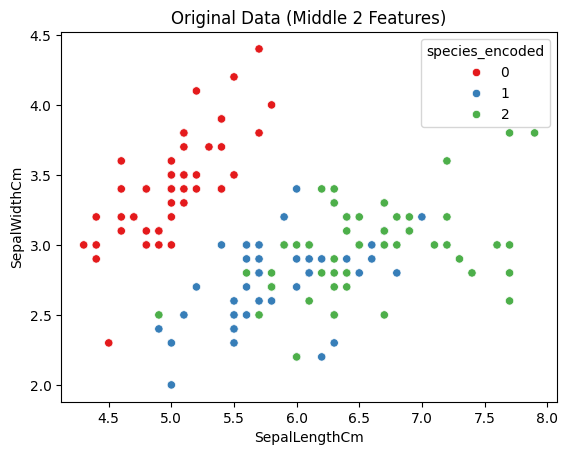

In [70]:
sns.scatterplot(
    x=df[feature_names[1]],
    y=df[feature_names[2]],
    hue=df['species_encoded'],
    palette='Set1'
)
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.title("Original Data (Middle 2 Features)")
plt.show()


## Standardize the data

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Apply PCA

In [80]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)


Explained variance ratio (2 components): [0.7470533  0.18435257]


## Scree Plot (Variance explained by each component)

## Visualize reduced dataset

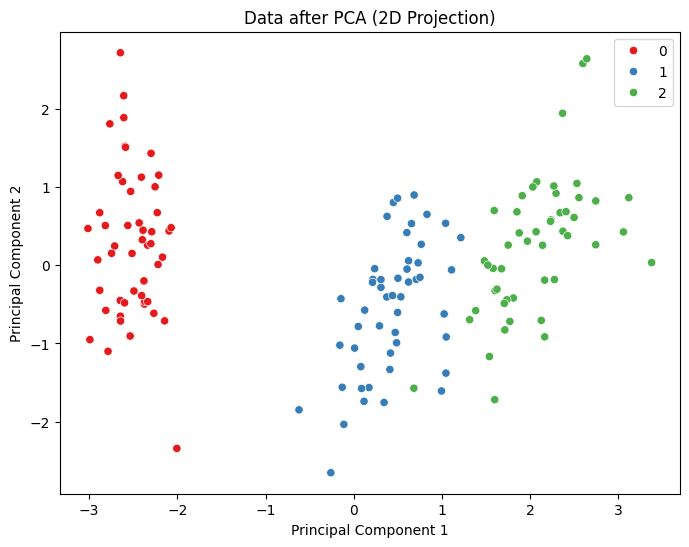

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data after PCA (2D Projection)")
plt.show()

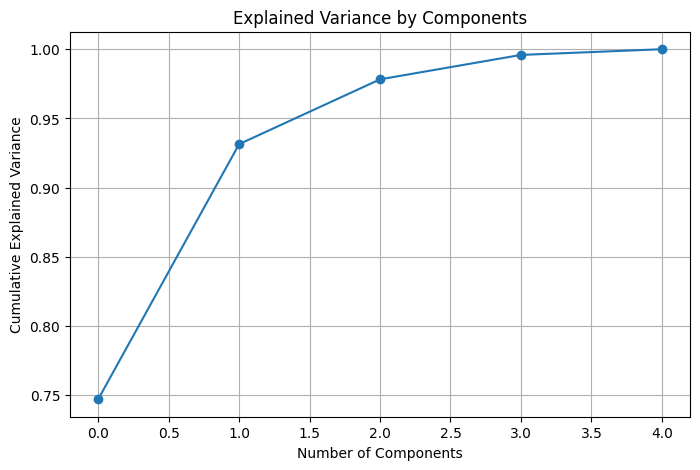

In [83]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid(True)
plt.show()


## 3D Scatter plot after PCA

In [85]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("Explained variance ratio (3 components):", pca_3d.explained_variance_ratio_)

Explained variance ratio (3 components): [0.7470533  0.18435257 0.04682624]


## PCA with 3 components

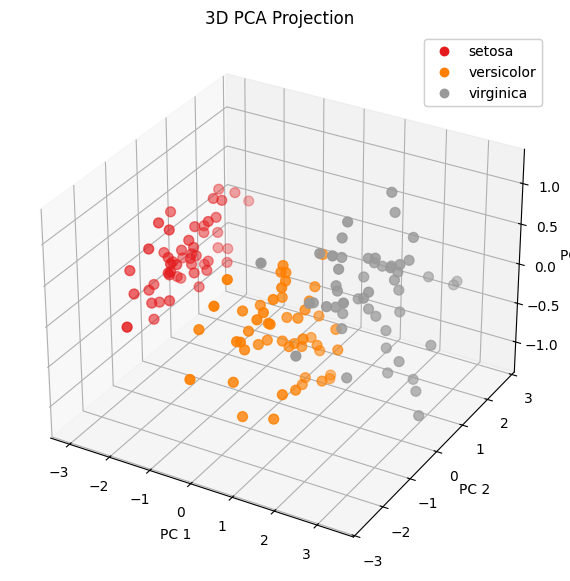

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
                     c=y, cmap='Set1', s=50)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("3D PCA Projection")

legend = ax.legend(handles=scatter.legend_elements()[0],
                   labels=list(iris.target_names), loc="upper right")
ax.add_artist(legend)

plt.show()
